In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.color import rgb2gray
import numpy as np
%matplotlib inline
from scipy import ndimage

In [2]:
img = cv2.imread("D:/image processing/excrise/HW1-1400-2/images/image1.jpg")
print(img.shape)

(500, 500, 3)


In [3]:
h, w, c = img.shape
print("Dimensions of the image is:nnHeight:", h, "pixelsnWidth:", w, "pixelsnNumber of Channels:", c)

Dimensions of the image is:nnHeight: 500 pixelsnWidth: 500 pixelsnNumber of Channels: 3


In [4]:
print(type(img))

<class 'numpy.ndarray'>


uint8


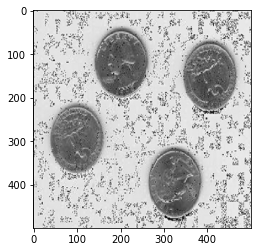

In [5]:
print(img.dtype)
plt.imshow(img) 

In [6]:
print(img)

[[[ 17  17  17]
  [ 14  14  14]
  [205 205 205]
  ...
  [224 224 224]
  [218 218 218]
  [216 216 216]]

 [[ 12  12  12]
  [ 16  16  16]
  [226 226 226]
  ...
  [246 246 246]
  [248 248 248]
  [250 250 250]]

 [[ 11  11  11]
  [ 14  14  14]
  [230 230 230]
  ...
  [247 247 247]
  [249 249 249]
  [250 250 250]]

 ...

 [[ 12  12  12]
  [ 11  11  11]
  [237 237 237]
  ...
  [ 29  29  29]
  [235 235 235]
  [235 235 235]]

 [[ 12  12  12]
  [ 11  11  11]
  [237 237 237]
  ...
  [141 141 141]
  [239 239 239]
  [245 245 245]]

 [[ 11  11  11]
  [ 11  11  11]
  [236 236 236]
  ...
  [249 249 249]
  [244 244 244]
  [248 248 248]]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


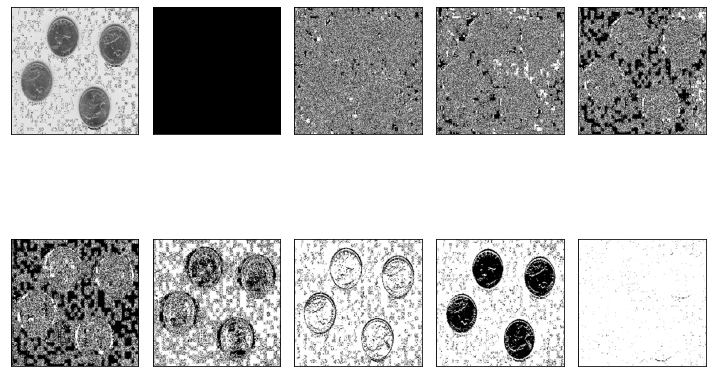

In [7]:
def extract_bit_plane(cd):
    #  extracting all bit one by one 
    # from 1st to 8th in variable 
    # from c1 to c8 respectively 
    c1 = np.mod(cd, 2)
    c2 = np.mod(np.floor(cd/2), 2)
    c3 = np.mod(np.floor(cd/4), 2)
    c4 = np.mod(np.floor(cd/8), 2)
    c5 = np.mod(np.floor(cd/16), 2)
    c6 = np.mod(np.floor(cd/32), 2)
    c7 = np.mod(np.floor(cd/64), 2)
    c8 = np.mod(np.floor(cd/128), 2)
    # combining image again to form equivalent to original grayscale image 
    cc = 2 * (2 * (2 * c8 + c7) + c6) # reconstructing image  with 3 most significant bit planes
    to_plot = [cd, c1, c2, c3, c4, c5, c6, c7, c8, cc]
    fig, axes = plt.subplots(nrows=2, ncols=5,figsize=(10, 8), subplot_kw={'xticks': [], 'yticks': []})
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    for ax, i in zip(axes.flat, to_plot):
        ax.imshow(i, cmap='gray')
    plt.tight_layout()
    plt.show()
    return cc
reconstructed_image = extract_bit_plane(img)

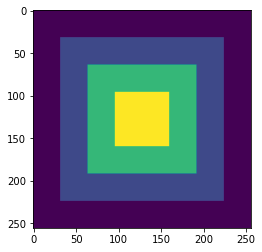

In [8]:
con_img = np.zeros([256, 256])
con_img[0:32, :] = 40 # upper row
con_img[:, :32] = 40 #left column
con_img[:, 224:256] = 40 # right column
con_img[224:, :] = 40 # lower row
con_img[32:64, 32:224] = 80 # upper row
con_img[64:224, 32:64] = 80 # left column
con_img[64:224, 192:224] = 80 # right column
con_img[192:224, 32:224] = 80 # lower row
con_img[64:96, 64:192] = 160 # upper row
con_img[96:192, 64:96] = 160 # left column
con_img[96:192, 160:192] = 160 # right column
con_img[160:192, 64:192] = 160 # lower row
con_img[96:160, 96:160] = 220
plt.imshow(con_img)

In [9]:
# We can obtain a total number of elements by using img.size
total_number_of_elements= img.size
print(total_number_of_elements)

750000


In [10]:
# To get the value of the pixel (x=50, y=50), we would use the following code
(b, g, r) = img[50, 50]
print("Pixel at (50, 50) - Red: {}, Green: {}, Blue: {}".format(r,g,b))

Pixel at (50, 50) - Red: 241, Green: 241, Blue: 241


In [11]:
# counting the number of pixels
number_of_white_pix = np.sum(img == 255)
number_of_black_pix = np.sum(img == 0)
  
print('Number of white pixels:', number_of_white_pix)
print('Number of black pixels:', number_of_black_pix)

Number of white pixels: 7071
Number of black pixels: 495


In [12]:
window_name = 'Image'
  
# Using cv2.cvtColor() method
# Using cv2.COLOR_BGR2GRAY color space
# conversion code
image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY )
  
# Displaying the image 
cv2.imshow(window_name, image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [13]:
image = cv2.cvtColor(img, cv2.COLOR_BGR2HSV )
# Displaying the image 
cv2.imshow(window_name, image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [14]:
# We can alternatively convert
# image by using cv2color
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
# Shows the image
cv2.imshow('image', img) 
  
cv2.waitKey(0)         
cv2.destroyAllWindows()

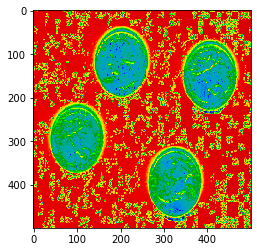

In [15]:
plt.imshow(img, cmap ='nipy_spectral') 

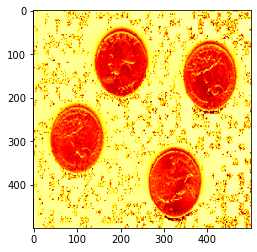

In [16]:
plt.imshow(img, cmap ='hot') 

In [17]:
laplacian = cv2.Laplacian(img, cv2.CV_64F)
cv2.imshow('EdgeMap', laplacian)
cv2.waitKey(0)         
cv2.destroyAllWindows()

In [18]:
# Python code to find the co-ordinates of
# the contours detected in an image.
  
# Reading image
font = cv2.FONT_HERSHEY_COMPLEX
  
# Reading same image in another 
# variable and converting to gray scale.
img = cv2.imread('D:/image processing/excrise/HW1-1400-2/images/image1.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('D:/image processing/excrise/HW1-1400-2/images/image1.jpg', cv2.IMREAD_COLOR)  
# Converting image to a binary image
# ( black and white only image).
_, threshold = cv2.threshold(img, 110, 255, cv2.THRESH_BINARY)
  
# Detecting contours in image.
contours, _= cv2.findContours(threshold, cv2.RETR_TREE,
                               cv2.CHAIN_APPROX_SIMPLE)
  
# Going through every contours found in the image.
for cnt in contours :
  
    approx = cv2.approxPolyDP(cnt, 0.009 * cv2.arcLength(cnt, True), True)
  
    # draws boundary of contours.
    cv2.drawContours(img2, [approx], 0, (0, 0, 255), 5) 
  
    # Used to flatted the array containing
    # the co-ordinates of the vertices.
    n = approx.ravel() 
    i = 0
  
    for j in n :
        if(i % 2 == 0):
            x = n[i]
            y = n[i + 1]
  
            # String containing the co-ordinates.
            string = str(x) + " " + str(y) 
  
            if(i == 0):
                # text on topmost co-ordinate.
                cv2.putText(img2, "Arrow tip", (x, y),
                                font, 0.5, (255, 0, 0)) 
            else:
                # text on remaining co-ordinates.
                cv2.putText(img2, string, (x, y), 
                          font, 0.5, (0, 255, 0)) 
        i = i + 1
  
# Showing the final image.
cv2.imshow('image2', img2) 
cv2.destroyAllWindows()

In [18]:
x= np.float64(img)
print (x)

[[ 17.  14. 205. ... 224. 218. 216.]
 [ 12.  16. 226. ... 246. 248. 250.]
 [ 11.  14. 230. ... 247. 249. 250.]
 ...
 [ 12.  11. 237. ...  29. 235. 235.]
 [ 12.  11. 237. ... 141. 239. 245.]
 [ 11.  11. 236. ... 249. 244. 248.]]


In [19]:
print("pixel at index (5,5): ", img[5][5])

pixel at index (5,5):  219


In [22]:
import os
file_size = os.path.getsize('D:/image processing/excrise/HW1-1400-2/images/image1.jpg')
print("File Size is :", file_size, "bytes")

File Size is : 138257 bytes


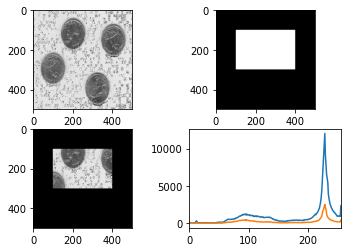

In [24]:
# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:300, 100:400] = 255
masked_img = cv2.bitwise_and(img,img,mask = mask)
# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])
plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])
plt.show()

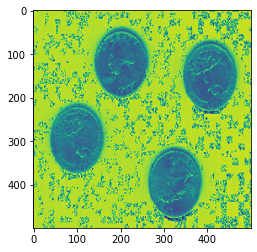

In [25]:
plt.imshow(img)

C:\Users\user\AppData\Local\Temp/ipykernel_10224/1492638432.py:1: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  gray = rgb2gray(img)


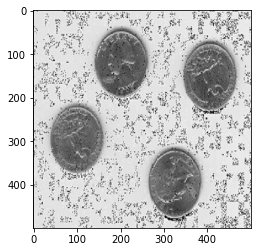

In [26]:
gray = rgb2gray(img)
plt.imshow(gray, cmap='gray')

In [ ]:
gray.shape

In [ ]:
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean():
        gray_r[i] = 1
    else:
        gray_r[i] = 0
gray = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.imshow(gray, cmap='gray')

In [ ]:
gray = rgb2gray(image)
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean():
        gray_r[i] = 3
    elif gray_r[i] > 0.5:
        gray_r[i] = 2
    elif gray_r[i] > 0.25:
        gray_r[i] = 1
    else:
        gray_r[i] = 0
gray = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.imshow(gray, cmap='gray')

In [ ]:
# converting to grayscale
gray = rgb2gray(image)

# defining the sobel filters
sobel_horizontal = np.array([np.array([1, 2, 1]), np.array([0, 0, 0]), np.array([-1, -2, -1])])
print(sobel_horizontal, 'is a kernel for detecting horizontal edges')
 
sobel_vertical = np.array([np.array([-1, 0, 1]), np.array([-2, 0, 2]), np.array([-1, 0, 1])])
print(sobel_vertical, 'is a kernel for detecting vertical edges')

In [ ]:
out_h = ndimage.convolve(gray, sobel_horizontal, mode='reflect')
out_v = ndimage.convolve(gray, sobel_vertical, mode='reflect')
# here mode determines how the input array is extended when the filter overlaps a border.
plt.imshow(out_h, cmap='gray')

In [ ]:
plt.imshow(out_v, cmap='gray')

In [ ]:
kernel_laplace = np.array([np.array([1, 1, 1]), np.array([1, -8, 1]), np.array([1, 1, 1])])
print(kernel_laplace, 'is a laplacian kernel')

In [ ]:
out_l = ndimage.convolve(gray, kernel_laplace, mode='reflect')
plt.imshow(out_l, cmap='gray')

In [ ]:
pic_n = img.reshape(img.shape[0]*img.shape[1], img.shape[2])
pic_n.shape

In [ ]:
img = img.astype('float64')
print(img.dtype)
plt.imshow(img) 

In [ ]:
#View and change bit depth
from PIL import Image
img = Image.open("D:/image processing/excrise/HW1-1400-2/images/image1.jpg")
print(img.getbands())

In [ ]:
import matplotlib.image as mpimg
rgb_image = mpimg.imread("D:/image processing/excrise/HW1-1400-2/images/image1.jpg")
r = rgb_image[:, :, 0]
g = rgb_image[:, :, 1]
b = rgb_image[:, :, 2]
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20,10))
ax1.set_title('R channel')
ax1.imshow(r, cmap = 'gray')
ax2.set_title('G channel')
ax2.imshow(g, cmap = 'gray')
ax3.set_title('B channel')
ax3.imshow(b, cmap = 'gray')

In [ ]:
# finding the difference between neighboring elements
result = np.diff(img)
print(result)

In [ ]:
result = np.diff(img, axis = 1)
print(result)

In [ ]:
result = np.diff(img, axis = 0)
print(result)

In [ ]:
imgFloat64= np.float64(img)
print (imgFloat64)

In [ ]:
print(imgFloat64.dtype)

In [ ]:
bgrgra = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
bgrhsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
brightlab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
 
cv2.imshow("Original Image", img)
 
cv2.imshow("BGR To Gray", bgrgra)
cv2.imshow("BGR To HSV", bgrhsv)
cv2.imshow("Bright To Labl", brightlab)
 
 
 
cv2.waitKey(0)
cv2.destroyAllWindows()